## Semana 2: Análises Temporais e Feature Engineering
### Objetivos:
#### Extrair inteligência das datas e entender padrões de comportamento de compra ao longo do tempo.

In [106]:
#Impotando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [107]:
#Dataframe Orders
df_orders = pd.read_csv('../dataframe_clean/df_orders_clean')

#Dataframe Itens
df_itens = pd.read_csv('../dataframe_clean/df_itens_clean')

#Dataframe Pagamentos
df_payments = pd.read_csv('../dataframe_clean/df_payments_clean')

In [108]:
#Convertendo as strings de Order que deveriam estar em formato datetime
orders_column = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in orders_column:
    df_orders[column] = pd.to_datetime(df_orders[column])

df_itens['shipping_limit_date'] = pd.to_datetime(df_itens['shipping_limit_date'])

#### Criação de Features Temporais
##### Extrair de order_purchase_timestamp:

 - **Dia da Semana** (0=Segunda, 6=Domingo)
 - **Nome do Dia** (mais legível para gráficos)
 - **Mês** (identificar sazonalidade mensal)
 - **Ano** 
 - **Hora** (0-23)
 - **Período do Dia** (Madrugada: 0-6h, Manhã: 6-12h, Tarde: 12-18h, Noite: 18-24h)

In [ ]:
#Criação de Features Temporais

#Nome do Dia da Semana
df_orders['nome_semana'] = df_orders['order_purchase_timestamp'].dt.day_name()

#Dia da Semana (0 - 6) Segunda = 0 Domingo = 6
df_orders['dia_semana'] = df_orders['order_purchase_timestamp'].dt.day_of_week

#Numero do Mês 0 - 12
df_orders['mes'] = df_orders['order_purchase_timestamp'].dt.month

#Ano da compra
df_orders['ano'] = df_orders['order_purchase_timestamp'].dt.year

#Horario da Compra
df_orders['hora'] = df_orders['order_purchase_timestamp'].dt.hour

#Frequência de Horario (Madrugada, Manhã, Tarde, Noite)
bins = [0, 6, 12, 18, 24]
labels = ['Madrugada', 'Manha', 'Tarde', 'Noite']

df_orders['categorias'] = pd.cut(df_orders['hora'], bins=bins, labels=labels, right=False)

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nome_semana,dia_semana,mes,ano,hora,categorias
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,0,10,2017,10,Manha
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,1,7,2018,20,Noite
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,2,8,2018,8,Manha
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,5,11,2017,19,Noite
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,1,2,2018,21,Noite


#### Análise de Sazonalidade
 - Agrupar vendas por dia da semana
 - Agrupar vendas por mês 
 - Criar gráfico de barras mostrando volume de pedidos por dia da semana
 - Período do Dia (Manhã, Tarde, Noite, Madrugada)

C:\Users\muril\AppData\Local\Temp\ipykernel_10112\3303485341.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= dia_da_semana, y=pedidos_por_semana.values, palette= 'Set2')


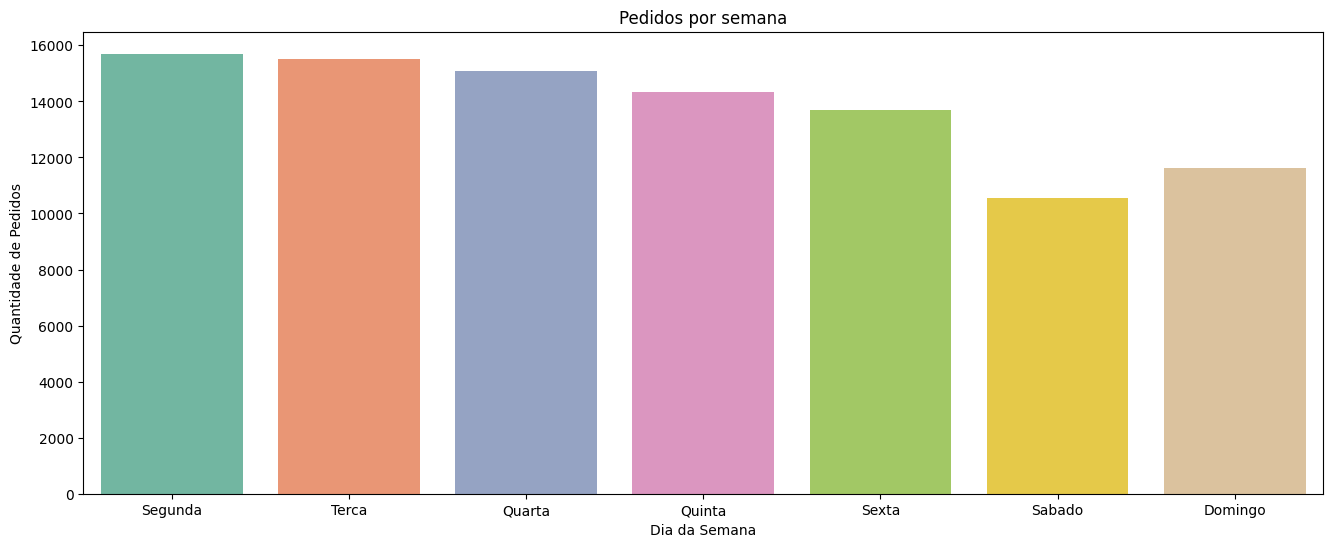

dia_semana
0    15701
1    15502
2    15074
3    14320
4    13680
5    10547
6    11631
Name: count, dtype: int64


In [ ]:
pedidos_por_semana = df_orders['dia_semana'].value_counts().sort_index()
dia_da_semana = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']

plt.figure(figsize=(16,6))
sns.barplot(x= dia_da_semana, y=pedidos_por_semana.values, palette= 'Set2')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Pedidos')
plt.title('Pedidos por semana')
plt.show()


C:\Users\muril\AppData\Local\Temp\ipykernel_10112\38295229.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nome_mes, y=pedidos_por_mes.values, palette='Set2')


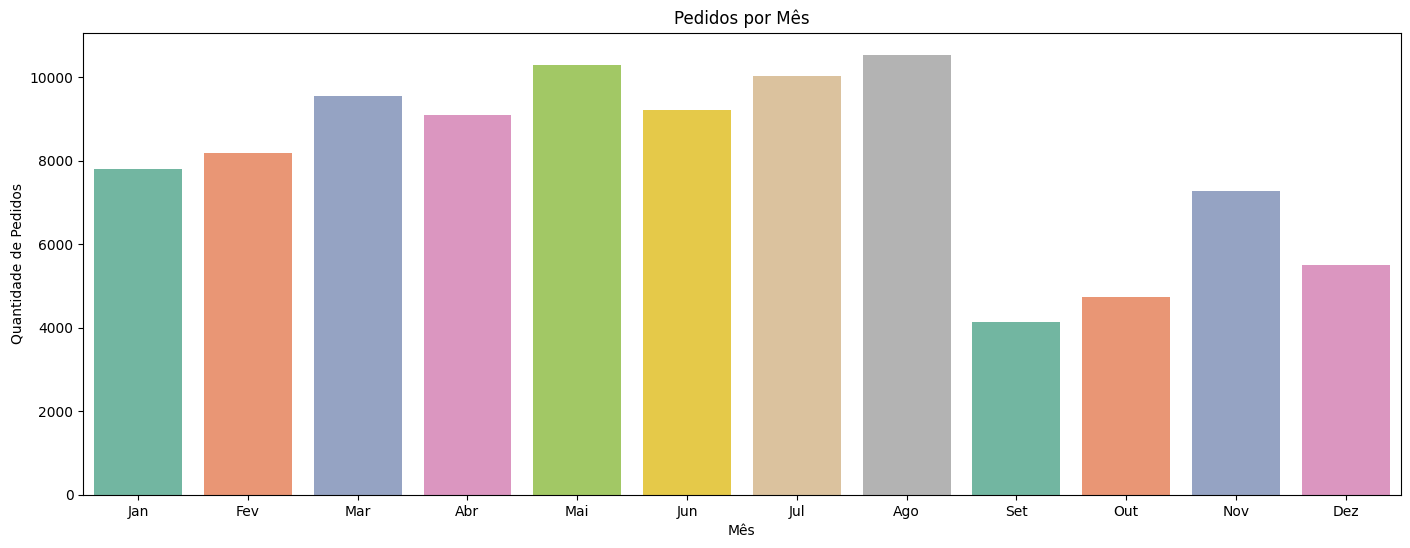

In [111]:
# Contar pedidos por mês
pedidos_por_mes = df_orders['mes'].value_counts().sort_index()
nome_mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Plotar gráfico de barras
plt.figure(figsize=(17, 6))
sns.barplot(x=nome_mes, y=pedidos_por_mes.values, palette='Set2')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Pedidos')
plt.title('Pedidos por Mês')
plt.show()

#### Identificação de Horários de Pico
 - Agrupar pedidos por hora do dia
 - Identificar horários com maior volume de conversões
 - Criar gráfico de linha mostrando distribuição ao longo do dia

C:\Users\muril\AppData\Local\Temp\ipykernel_10112\4001325918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hora_mais_comprada.index, y=hora_mais_comprada.values, palette='Set2')


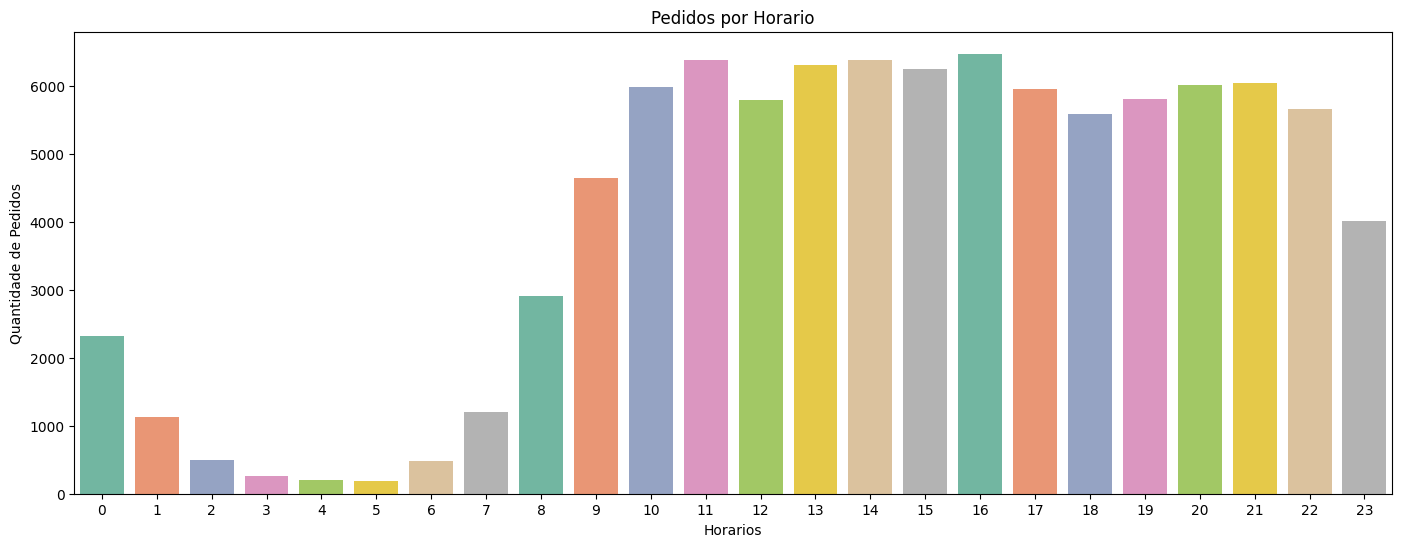

In [112]:
hora_mais_comprada = df_orders['hora'].value_counts().sort_index()

plt.figure(figsize=(17, 6))
sns.barplot(x=hora_mais_comprada.index, y=hora_mais_comprada.values, palette='Set2')
plt.xlabel('Horarios')
plt.ylabel('Quantidade de Pedidos')
plt.title('Pedidos por Horario')
plt.show()

#### Análise por Período do Dia
 - Comparar volume de vendas em cada período (Madrugada, Manhã, Tarde, Noite)
 - Identificar quando clientes preferem comprar
 - Criar gráfico de pizza ou barras


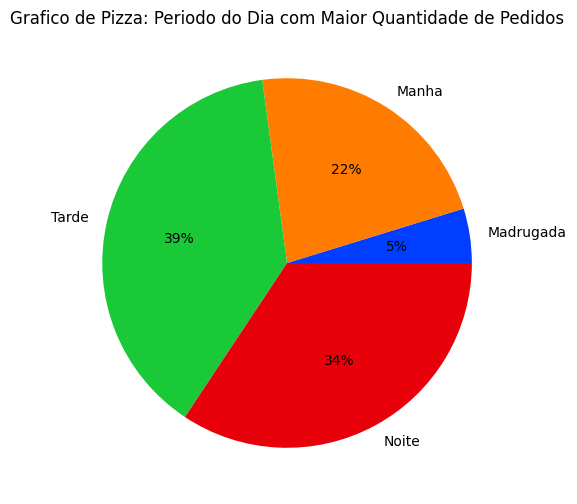

In [113]:
periodo_mais_comprado = df_orders['categorias'].value_counts().sort_index()

plt.figure(figsize=(17, 6))
colors = sns.color_palette('bright')
plt.pie(periodo_mais_comprado.values, labels = periodo_mais_comprado.index, colors=colors, autopct='%.0f%%')
plt.title("Grafico de Pizza: Periodo do Dia com Maior Quantidade de Pedidos")
plt.show()

#### Análise Cruzada: Dia da Semana vs Hora
 - Criar uma tabela dinâmica cruzando Dia da Semana x Hora
 - Visualizar com heatmap (Seaborn) para identificar "sweet spots"

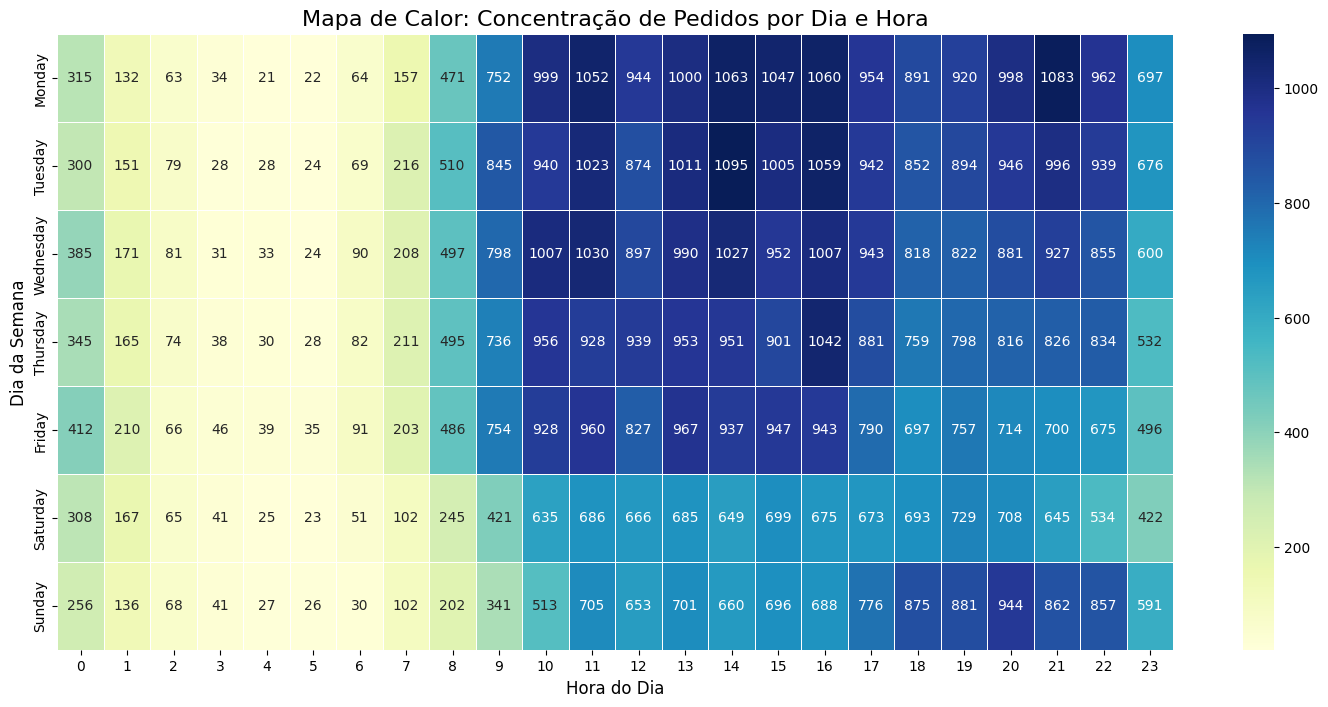

In [114]:
mapa_calor_dados = pd.crosstab(df_orders['nome_semana'], df_orders['hora'])

ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapa_calor_dados = mapa_calor_dados.reindex(ordem_dias)

plt.figure(figsize=(18, 8))
sns.heatmap(
    mapa_calor_dados, 
    annot=True,      # Mostra os números dentro dos quadradinhos
    fmt="d",         # Formata como número inteiro
    cmap="YlGnBu",   # Uma paleta de cores que vai do amarelo ao azul escuro
    linewidths=.5    # Adiciona uma linha fina entre os quadrados para facilitar a leitura
)

plt.title('Mapa de Calor: Concentração de Pedidos por Dia e Hora', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Dia da Semana', fontsize=12)
plt.show()

## Insights de Negócio e Recomendações

### Padrões Identificados:

- **Dia com mais vendas**: Os dias úteis (segunda a sexta) concentram o maior volume de vendas, com queda drástica nos fins de semana (sábado e domingo), representando aproximadamente 25% menos transações.

- **Horário de pico**: O horário de pico de compras ocorre entre as 10h e 21h, principalmente nos períodos da tarde e noite, quando a atividade comercial é mais intensa.

- **Período do dia mais comprado**: Tarde e Noite concentram aproximadamente 70% de todas as compras da semana.

- **Sweet spot identificado**: 
  - Segunda a Quinta: 10h-21h (melhor desempenho)
  - Sexta: 10h-16h
  - Domingo: 17h-22h
  - **Segunda-feira é o melhor dia da semana**, apresentando múltiplos picos de conversão ao longo do dia.

### Hipótese de Negócio:

Observamos que as compras concentram-se em dias úteis, sugerindo que os clientes priorizam atividades de compra durante horário comercial (entre compromissos de trabalho). Aos fins de semana, há uma redução significativa, possivelmente porque clientes destinam esse período para descanso e atividades de lazer fora de casa, reduzindo o tempo dedicado a compras online.

### Recomendações para o Negócio (Ordem de Prioridade):

1. **Ação Imediata - Maximizar Segunda-feira**: Implementar campanha de cupom de desconto ou frete grátis para segunda-feira (10h-21h), capitalizar no pico natural de conversões.

2. **Investigação - Recuperar Fins de Semana**: Conduzir análise qualitativa com clientes sobre comportamento nos fins de semana. Testar campanhas de retargeting nos sábados/domingos com oferta focada em lazer/descanso.

3. **Planejamento Sazonal**: Aumentar orçamento de publicidade e tráfego pago para setembro-outubro (períodos com queda observada) e novembro-dezembro, aproveitando eventos como Black Friday e Cyber Monday.

### Próximos Passos:

1. Executar teste A/B com cupom de desconto na segunda-feira por 2 semanas
2. Realizar pesquisa com clientes sobre comportamento de compra nos fins de semana
3. Estruturar calendário de campanhas sazonais para setembro-dezembro